In [7]:
# !python -m nltk.downloader popular
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk
from nltk.corpus import stopwords
import re
import string

In [8]:
df = pd.read_csv("buruh_tweets_202112.csv")
df.head()

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


In [9]:
# Menghilangkan angka, tanda baca dan whitespaces
non_angka = [re.sub(r"\d+", "", x) for x in df["tweet"]]
non_simbol = [x.translate(str.maketrans("","",string.punctuation)) for x in non_angka]
non_spaces = [x.strip() for x in non_simbol]
print(non_spaces[:3])

['Tak Sesuai Kesepakatan Buruh Tangerang Raya Tolak Penetapan UMK Banten  hingga Ancam Aksi Besarbesaran httpstcosbVetqbNMO', 'Resty Kenapa demo buruh yg berjubel dapat izinmakin terang benderang siapa mereka', 'Demo Buruh Rentan Ditunggangi Provokator\nhttpstcoIYngAWN\nAyo Disiplin Prokes']


In [10]:
# Case Folding
case_folding = [item.lower() for item in non_spaces]
print(case_folding)

['tak sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten  hingga ancam aksi besarbesaran httpstcosbvetqbnmo', 'resty kenapa demo buruh yg berjubel dapat izinmakin terang benderang siapa mereka', 'demo buruh rentan ditunggangi provokator\nhttpstcoiyngawn\nayo disiplin prokes', 'geloraco buruh pp juga kemarin demo gak ada tuh pasalan yg ada polisi yg jadi pasien \ndi bali juga simpatisan opm asoy aja sampe tawuran malah sila ke  diumpetin kemana', 'berikanlah kepada buruh upahnya sebelum kering keringatnya hr abu yula', 'gaji klau boss x kasi full seperti yang di janjikan boleh report dkt pejabat buruh x', 'ratusan buruh yang tergabung dalam forum komunikasi pekerja antar kebun fk pak menggelar demonstrasi di kantor pemkab hingga dprd jember rabu httpstcobuthvcagb', 'buruh ngeluh ump naik dikit bahlil yus samasama berjiwa besar httpstcoagnnzvptf', 'yarachantique buruh g punya hati bajingan', 'zzulfikli kena perkasakan pejabat buruh malaysia buat macam singapore pejabat bu

In [11]:
# Menghilangkan Stopwords
stop_words = set(stopwords.words("indonesian"))
word_token = [word_tokenize(item) for item in case_folding]
word_clean = []
for i in word_token:
  word_clean.append(" ".join([w for w in i if not w in stop_words]))
print(word_clean)

['sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten ancam aksi besarbesaran httpstcosbvetqbnmo', 'resty demo buruh yg berjubel izinmakin terang benderang', 'demo buruh rentan ditunggangi provokator httpstcoiyngawn ayo disiplin prokes', 'geloraco buruh pp kemarin demo gak tuh pasalan yg polisi yg pasien bali simpatisan opm asoy aja sampe tawuran sila diumpetin kemana', 'berikanlah buruh upahnya kering keringatnya hr abu yula', 'gaji klau boss x kasi full janjikan report dkt pejabat buruh x', 'ratusan buruh tergabung forum komunikasi pekerja kebun fk menggelar demonstrasi kantor pemkab dprd jember rabu httpstcobuthvcagb', 'buruh ngeluh ump dikit bahlil yus samasama berjiwa httpstcoagnnzvptf', 'yarachantique buruh g hati bajingan', 'zzulfikli kena perkasakan pejabat buruh malaysia singapore pejabat buruh orang sistematik saman company langgar arahan', 'brigittasiw kudu redefinisi ulang paham definisi buruh kali selebgram', 'lulusan s mamarika ubah pp buruh dkijakarta kemn

In [12]:
# Mengecek kata slang
word_list = [word_tokenize(x) for x in word_clean]
tweets = [word for tweet in word_list for word in tweet]
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(100)
print(most_common_word)

[('buruh', 1117), ('yg', 265), ('demo', 226), ('upah', 159), ('cnnindonesia', 149), ('gaji', 139), ('umk', 103), ('berjiwa', 102), ('kerja', 90), ('aksi', 76), ('gak', 73), ('aja', 72), ('ya', 71), ('ga', 68), ('kenaikan', 63), ('ump', 58), ('pengusaha', 57), ('pabrik', 54), ('bahlil', 50), ('hidup', 50), ('pejabat', 48), ('orang', 48), ('indonesia', 46), ('rakyat', 46), ('negara', 42), ('pemerintah', 40), ('gubernur', 40), ('jokowi', 39), ('kalo', 36), ('perusahaan', 35), ('serikat', 35), ('penetapan', 33), ('mogok', 32), ('gajinya', 32), ('menteri', 31), ('guru', 30), ('kebutuhan', 30), ('tuntut', 29), ('mahasiswa', 29), ('jg', 29), ('jd', 29), ('uu', 28), ('kecewa', 28), ('ditunggangi', 27), ('udah', 27), ('anies', 26), ('ichavarma', 26), ('amp', 26), ('kaum', 26), ('ancam', 25), ('kemarin', 25), ('ajak', 25), ('klo', 25), ('dgn', 25), ('sih', 25), ('ekonomi', 25), ('anak', 25), ('pekerja', 24), ('nya', 24), ('pandemi', 24), ('jawa', 24), ('coba', 23), ('kaya', 23), ('masyarakat', 2

In [13]:
# Menghilangkan bahasa slang
slang_list = {
    "yg" : "yang",
    "gak" : "tidak",
    "aja" : "saja",
    "ya" : "iya",
    "ga" : "tidak",
    "kalo" : "kalau",
    "jg" : "juga",
    "jd" : "jadi",
    "udah" : "sudah",
    "klo" : "kalau",
    "dgn" : "dengan",
    "sih" : "",
    "nya" : "",
    "kau" : "kamu",
    "tdk" : "tidak",
    "lu" : "kamu",
    "jatim" : "jawa timur",
    "mah" : "",
    "sj" : "saja",
    "tuh" : "",
    "emang" : "memang"
}
result = []
for tweet in word_clean:
  word_list2 = []
  for word in word_tokenize(tweet):
    if slang_list.get(word):
      word = slang_list[word]
    word_list2.append(word)
  result.append(" ".join(word_list2))

# Menghilangkan stopwords
word_token2 = [word_tokenize(item) for item in result]
word_clean2 = []
for i in word_token2:
  word_clean2.append(" ".join([w for w in i if not w in stop_words]))
print(word_clean2)

['sesuai kesepakatan buruh tangerang raya tolak penetapan umk banten ancam aksi besarbesaran httpstcosbvetqbnmo', 'resty demo buruh berjubel izinmakin terang benderang', 'demo buruh rentan ditunggangi provokator httpstcoiyngawn ayo disiplin prokes', 'geloraco buruh pp kemarin demo tuh pasalan polisi pasien bali simpatisan opm asoy sampe tawuran sila diumpetin kemana', 'berikanlah buruh upahnya kering keringatnya hr abu yula', 'gaji klau boss x kasi full janjikan report dkt pejabat buruh x', 'ratusan buruh tergabung forum komunikasi pekerja kebun fk menggelar demonstrasi kantor pemkab dprd jember rabu httpstcobuthvcagb', 'buruh ngeluh ump dikit bahlil yus samasama berjiwa httpstcoagnnzvptf', 'yarachantique buruh g hati bajingan', 'zzulfikli kena perkasakan pejabat buruh malaysia singapore pejabat buruh orang sistematik saman company langgar arahan', 'brigittasiw kudu redefinisi ulang paham definisi buruh kali selebgram', 'lulusan s mamarika ubah pp buruh dkijakarta kemnaker 😂 bro kewena

In [14]:
# Mengecek perubahan kata slang
word_list = [word_tokenize(x) for x in word_clean2]
tweets = [word for tweet in word_list for word in tweet]
fqdist = FreqDist(tweets)
most_common_word = fqdist.most_common(30)
print(most_common_word)

[('buruh', 1117), ('demo', 226), ('upah', 159), ('cnnindonesia', 149), ('gaji', 139), ('umk', 103), ('berjiwa', 102), ('kerja', 90), ('iya', 78), ('aksi', 76), ('kenaikan', 63), ('ump', 58), ('pengusaha', 57), ('pabrik', 54), ('bahlil', 50), ('hidup', 50), ('pejabat', 48), ('orang', 48), ('indonesia', 46), ('rakyat', 46), ('jawa', 44), ('negara', 42), ('pemerintah', 40), ('gubernur', 40), ('jokowi', 39), ('perusahaan', 35), ('serikat', 35), ('penetapan', 33), ('mogok', 32), ('gajinya', 32)]


In [15]:
# Memperbarui dataframe
df["clean_tweet"] = word_clean2
df.head()

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688,sesuai kesepakatan buruh tangerang raya tolak ...
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978,resty demo buruh berjubel izinmakin terang ben...
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497,demo buruh rentan ditunggangi provokator https...
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896,geloraco buruh pp kemarin demo tuh pasalan pol...
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958,berikanlah buruh upahnya kering keringatnya hr...


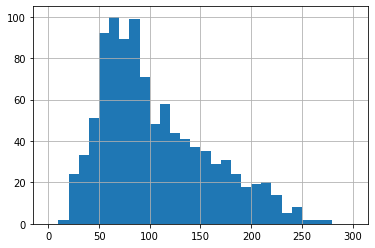

In [18]:
# Distribusi Frekuensi Karakter per Tweet
bin_range = np.arange(0, 310, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)
plt.show()

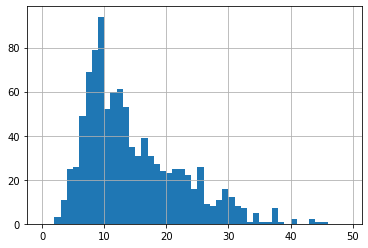

In [21]:
# Distribusi Panjang Kata per Tweet
bin_range = np.arange(0, 50)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

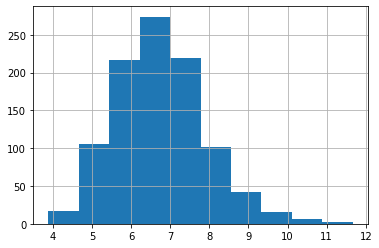

In [22]:
# Distribusi Panjang Rata - Rata Kata per Tweet
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

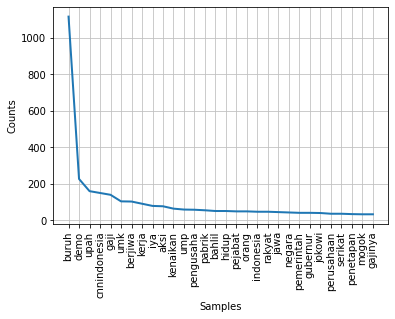

In [27]:
# Distribusi Kata
tweet_token = df["clean_tweet"].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in tweet_token for word in tweet]
fqdist = FreqDist(tweets)
fqdist.plot(30,cumulative=False)
plt.show()

In [29]:
# Distribusi Bi-gram
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)

(demo, buruh)                98
(buruh, demo)                52
(cnnindonesia, buruh)        43
(buruh, pabrik)              34
(upah, buruh)                32
(buruh, berjiwa)             31
(jawa, timur)                30
(serikat, buruh)             26
(kaum, buruh)                24
(gaji, buruh)                21
(kenaikan, upah)             19
(buruh, jawa)                18
(mogok, kerja)               17
(penetapan, ump)             16
(cipta, kerja)               16
(buruh, tani)                16
(tuntut, upah)               16
(upah, minimum)              16
(ditunggangi, provokator)    15
(umk, buruh)                 15
dtype: int64


In [30]:
# Analisis
'''
Algoritma menghilangkan stopwords perlu dilakukan sebanyak dua kali. Hal ini
dilakukan karena stopwords pertama tidak dapat menghilangkan bahasa slang. Maka
dari itu perlu dilakukan stopwords kedua setelah menghilangkan bahasa slang.
Jika dilakukan terlebih dahulu menghilangkan slang kemudian melakukan stopwords
sehingga tidak perlu dilakukan stopwords sebanyak dua kali, maka akan kesulitan
dalam mengatasi bahasa slang yang memerlukan cara manual untuk mengetahui banyak
kata pada suatu data.

Keseluruhan tweet membahas tentang demo para buruh terhadap penetapan ump/umk
yang disahkan dalam uu cipta kerja. Demo buruh yang dilakukan terjadi di jawa
timur. Demo buruh dilakukan oleh para serikat buruh khususnya buruh pabrik
melakukan penuntutan terhadap gaji atau upah buruh yang ditetapkan.

tweet tentang demo para buruh ini mayoritas memiliki tweet berada pada 7 - 14
kata dengan setiap kata berada di antara 6 - 8 karakter dan total 50 - 100 
karakter yang memiliki diatas 60 tweet.
'''

'\nAlgoritma menghilangkan stopwords perlu dilakukan sebanyak dua kali. Hal ini\ndilakukan karena stopwords pertama tidak dapat menghilangkan bahasa slang. Maka\ndari itu perlu dilakukan stopwords kedua setelah menghilangkan bahasa slang.\nJika dilakukan terlebih dahulu menghilangkan slang kemudian melakukan stopwords\nsehingga tidak perlu dilakukan stopwords sebanyak dua kali, maka akan kesulitan\ndalam mengatasi bahasa slang yang memerlukan cara manual untuk mengetahui banyak\nkata pada suatu data.\n\nKeseluruhan tweet membahas tentang demo para buruh terhadap penetapan ump/umk\nyang disahkan dalam uu cipta kerja. Demo buruh yang dilakukan terjadi di jawa\ntimur. Demo buruh dilakukan oleh para serikat buruh khususnya buruh pabrik\nmelakukan penuntutan terhadap gaji atau upah buruh yang ditetapkan.\n\ntweet tentang demo para buruh ini mayoritas memiliki tweet berada pada 7 - 14\nkata dengan setiap kata berada di antara 6 - 8 karakter dan total 50 - 100 \nkarakter yang memiliki diatas 